In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
import re

In [2]:
pattern = re.compile(r'(\d+):(\d+)\.(\d+)')
def to_time(s):
    m = pattern.search(s)
    if int(m.group(3)) > 10:
        return int(m.group(1))*60 + int(m.group(2)) + int(m.group(3))*0.001
    else:
        return int(m.group(1))*60 + int(m.group(2)) + int(m.group(3))*0.1

In [3]:
def DealWithTime(data):
    data['time'] = data['timestamp'].apply(to_time)
    return data.drop('timestamp',axis=1)

In [4]:
def GetData(filename):
    data = pd.read_csv(filename)
    data = data[['loggingTime(txt)','motionUserAccelerationX(G)', 'motionUserAccelerationY(G)', 'motionUserAccelerationZ(G)',\
                 'gyroRotationX(rad/s)', 'gyroRotationY(rad/s)', 'gyroRotationZ(rad/s)',\
                 'motionYaw(rad)', 'motionRoll(rad)', 'motionPitch(rad)']]
    colums_name = ['timestamp','accX', 'accY', 'accZ', 'gyroX', 'gyroY', 'gyroZ', 'yaw','roll', 'pitch']
    data.columns = colums_name
    return data

In [5]:
def Overview(data):
    plt.figure(figsize=(15,20))
    p1 = plt.subplot(3,1,1)
    p2 = plt.subplot(3,1,2)
    p3 = plt.subplot(3,1,3)
    p1.plot(left['accX'])
    p2.plot(left['accY'])
    p3.plot(left['accZ'])
    plt.show()

    plt.figure(figsize=(15,20))
    p4 = plt.subplot(3,1,1)
    p5 = plt.subplot(3,1,2)
    p6 = plt.subplot(3,1,3)
    p4.plot(left['gyroX'])
    p5.plot(left['gyroY'])
    p6.plot(left['gyroZ'])
    plt.show()

In [6]:
def butter_bandpass(lowcut, highcut, fs, order=3):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=3):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

def butter_lowpass(highcut, fs, order=3):
    nyq = 0.5 * fs
    high = highcut / nyq
    b, a = signal.butter(order, high, btype='lowpass')
    return b, a

def butter_lowpass_filter(data, highcut, fs, order=3):
    b, a = butter_lowpass(highcut, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

def getStepFrequency(data):
    ffted = np.fft.fft(data)
    freqs = np.fft.fftfreq(len(ffted))
    idx = np.argmax(np.abs(ffted))
    freq = freqs[idx]
    return abs(freq*fs)

fs = 30

In [7]:
# left = GetData("../dataset/zmq_left_2017-11-27_14-31-39_-0800.csv")
# right =  GetData("../dataset/zmq_right_2017-11-27_14-31-48_-0800.csv")
left = GetData("../dataset/lzy_left_2017-11-27_14-36-05_-0800.csv")
right =  GetData("../dataset/lzy_right_2017-11-27_14-36-02_-0800.csv")

In [8]:
left = DealWithTime(left)
right = DealWithTime(right)

In [9]:
print(left[:10])
print(right[:10])

       accX      accY      accZ     gyroX     gyroY     gyroZ       yaw  \
0 -0.054908 -0.033779 -0.015947 -1.434913 -0.383643  0.079062  1.531584   
1 -0.027325 -0.067527 -0.061354 -1.238212 -0.721295 -0.184249  1.541347   
2  0.060780 -0.114612 -0.111279 -1.101879 -1.085586 -0.193119  1.546554   
3  0.060780 -0.114612 -0.111279 -0.385314 -0.893786 -0.194056  1.546554   
4 -0.033625 -0.031210  0.012895  0.146195 -0.090542 -0.495578  1.522291   
5 -0.033625 -0.031210  0.012895  0.361149 -0.424875 -0.715039  1.522291   
6  0.106583 -0.052539  0.107593  0.032954 -1.086913 -0.639072  1.496182   
7 -0.003565  0.043732  0.096039 -0.026854 -1.409816 -0.930165  1.473896   
8 -0.112620  0.100395  0.175067 -0.134091 -1.072691 -1.351176  1.437771   
9 -0.145053  0.197194  0.155242 -0.081270 -1.290678 -2.224208  1.381660   

       roll     pitch      time  
0  0.353588  0.027168  2166.600  
1  0.327953 -0.015984  2166.037  
2  0.289316 -0.053236  2166.067  
3  0.289316 -0.053236  2166.098  
4  0

In [10]:
left = left[857:1300]
# left = left[450:1000] zmq
left = left.reset_index(drop=True)
# Overview(left)

In [ ]:
highcut = 6
filtered = butter_lowpass_filter(left['accY'],highcut, fs)
plt.figure(figsize=(10,5))
plt.plot(filtered)
plt.show()
plt.figure(figsize=(10,5))
plt.plot(np.fft.rfft(filtered))
plt.show()
plt.figure(figsize=(10,5))
plt.plot(left['accY'])
plt.show()
plt.figure(figsize=(10,5))
plt.plot(np.fft.rfft(left['accY']))
plt.show()

In [ ]:
lowcut = 0.08
highcut = 7
filtered = butter_bandpass_filter(left['gyroZ'],lowcut, highcut, fs)
plt.figure(figsize=(10,5))
plt.plot(filtered)
plt.show()
plt.figure(figsize=(10,5))
plt.plot(np.fft.rfft(filtered))
plt.show()
plt.figure(figsize=(10,5))
plt.plot(left['gyroZ'])
plt.show()

In [11]:
highcut = 6
left['accX'] = butter_lowpass_filter(left['accX'],highcut, fs)
left['accY'] = butter_lowpass_filter(left['accY'],highcut, fs)
left['accZ'] = butter_lowpass_filter(left['accZ'],highcut, fs)

In [12]:
lowcut = 0.08
highcut = 7
left['gyroX'] = butter_bandpass_filter(left['gyroX'],lowcut, highcut, fs)
left['gyroY'] = butter_bandpass_filter(left['gyroY'],lowcut, highcut, fs)
left['gyroZ'] = butter_bandpass_filter(left['gyroZ'],lowcut, highcut, fs)

In [13]:
print(getStepFrequency(left['accY']))
print(getStepFrequency(left['accX']))
print(getStepFrequency(left['accZ']))
print(getStepFrequency(left['gyroY']))
print(getStepFrequency(left['gyroX']))
print(getStepFrequency(left['gyroZ']))

0.0
0.948081264108
0.948081264108
0.948081264108
0.948081264108
0.948081264108


In [14]:
step_frequency = getStepFrequency(left['gyroZ'])

In [15]:
step_cycle = int(round(fs/step_frequency))

In [16]:
def seperateEachStep(data, step_cycle):
    steps = pd.DataFrame()
    for i in range(0, data.shape[0], step_cycle):
        idx = np.argmin(data['gyroZ'].iloc[i:i+step_cycle])
        steps = steps.append(data.iloc[idx])
    return steps

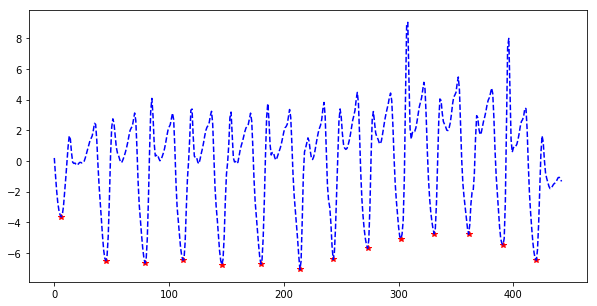

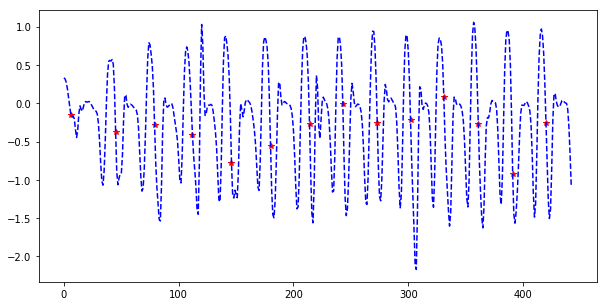

In [17]:
steps = seperateEachStep(left, step_cycle)
plt.figure(figsize=(10,5))
plt.plot(steps['gyroZ'],'r*',left['gyroZ'], 'b--')
plt.show()
plt.figure(figsize=(10,5))
plt.plot(steps['accY'],'r*',left['accY'], 'b--')
plt.show()

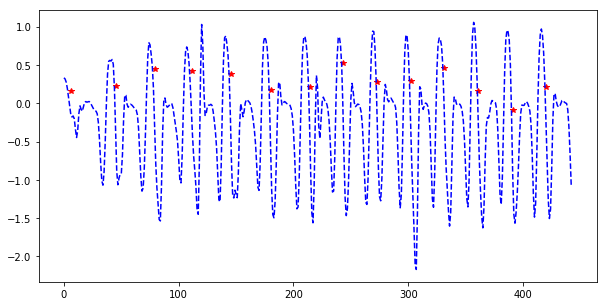

In [19]:
plt.figure(figsize=(10,5))
plt.plot(steps['accX'],'r*',left['accY'], 'b--')
plt.show()

In [18]:
steps['initVy'] = np.multiply(0.15* steps['gyroZ'], - np.sin(steps['yaw']))
steps['initVx'] = np.multiply(0.15* steps['gyroZ'], np.cos(steps['yaw']))
steps['endVy'] = steps['initVy'].shift(-1)
steps['endVx'] = steps['initVx'].shift(-1)
print(steps)

         accX      accY      accZ     gyroX     gyroY     gyroZ     pitch  \
6    0.160385 -0.148223 -0.100784  1.037023  0.198564 -3.649418  1.394318   
45   0.230041 -0.369188 -0.014677  1.682660 -1.819115 -6.499644  1.309433   
79   0.446921 -0.288705 -0.131857  2.504947 -1.979866 -6.666089  1.285199   
112  0.423475 -0.413175 -0.070964  2.617050 -2.116961 -6.474052  1.289527   
146  0.380931 -0.776850 -0.216641  2.623241 -2.476844 -6.769069  1.281013   
180  0.169259 -0.560986 -0.055822  2.857077 -2.178751 -6.730868  1.306373   
214  0.217449 -0.274689  0.266844  2.516546 -1.944002 -7.080297  1.305036   
243  0.527857 -0.013847  0.117254  2.497870 -2.036010 -6.428257  1.167692   
273  0.280365 -0.259890  0.153085  2.064548 -1.995791 -5.706959  1.297234   
302  0.290476 -0.219256  0.146519  2.327225 -1.601110 -5.074281  1.339300   
331  0.455035  0.083551  0.044193  1.924267 -1.566129 -4.758603  1.294630   
361  0.160444 -0.270431  0.122452  2.060691 -2.220767 -4.783359  1.324113   

In [20]:
steps['begin_idx'] = steps.index
steps['end_idx'] = steps['begin_idx'].shift(-1)
steps = steps.dropna()
steps['end_idx'] = steps['end_idx'].astype(int)

In [21]:
def calcSpeedY(data, begin, end):
    return data.loc[begin:end, 'accY'].sum()/fs
def calcSpeedZ(data, begin, end):
    return data.loc[begin:end, 'accZ'].sum()/fs
def calcSpeedX(data, begin, end):
    return data.loc[begin:end, 'accX'].sum()/fs

In [22]:
steps['calcVy'] = steps.apply((lambda row: calcSpeedY(left, row['begin_idx'], row['end_idx'])), axis=1)
steps['calcVz'] = steps.apply((lambda row: calcSpeedZ(left, row['begin_idx'], row['end_idx'])), axis=1)
steps['calcVx'] = steps.apply((lambda row: calcSpeedX(left, row['begin_idx'], row['end_idx'])), axis=1)
steps['calcVy'] = steps['calcVy']+ steps['initVy']
steps['calcVx'] = steps['calcVx']+ steps['initVx']

In [23]:
print(steps)

         accX      accY      accZ     gyroX     gyroY     gyroZ     pitch  \
6    0.160385 -0.148223 -0.100784  1.037023  0.198564 -3.649418  1.394318   
45   0.230041 -0.369188 -0.014677  1.682660 -1.819115 -6.499644  1.309433   
79   0.446921 -0.288705 -0.131857  2.504947 -1.979866 -6.666089  1.285199   
112  0.423475 -0.413175 -0.070964  2.617050 -2.116961 -6.474052  1.289527   
146  0.380931 -0.776850 -0.216641  2.623241 -2.476844 -6.769069  1.281013   
180  0.169259 -0.560986 -0.055822  2.857077 -2.178751 -6.730868  1.306373   
214  0.217449 -0.274689  0.266844  2.516546 -1.944002 -7.080297  1.305036   
243  0.527857 -0.013847  0.117254  2.497870 -2.036010 -6.428257  1.167692   
273  0.280365 -0.259890  0.153085  2.064548 -1.995791 -5.706959  1.297234   
302  0.290476 -0.219256  0.146519  2.327225 -1.601110 -5.074281  1.339300   
331  0.455035  0.083551  0.044193  1.924267 -1.566129 -4.758603  1.294630   
361  0.160444 -0.270431  0.122452  2.060691 -2.220767 -4.783359  1.324113   

In [24]:
steps['deltaVy'] = steps['calcVy'] - steps['endVy']
steps['deltaVx'] = steps['calcVx'] - steps['endVx']

In [25]:
steps['deltaT'] = (steps['end_idx'] - steps['begin_idx'])/fs

In [26]:
steps = steps.reset_index(drop=True)
print(steps)

        accX      accY      accZ     gyroX     gyroY     gyroZ     pitch  \
0   0.160385 -0.148223 -0.100784  1.037023  0.198564 -3.649418  1.394318   
1   0.230041 -0.369188 -0.014677  1.682660 -1.819115 -6.499644  1.309433   
2   0.446921 -0.288705 -0.131857  2.504947 -1.979866 -6.666089  1.285199   
3   0.423475 -0.413175 -0.070964  2.617050 -2.116961 -6.474052  1.289527   
4   0.380931 -0.776850 -0.216641  2.623241 -2.476844 -6.769069  1.281013   
5   0.169259 -0.560986 -0.055822  2.857077 -2.178751 -6.730868  1.306373   
6   0.217449 -0.274689  0.266844  2.516546 -1.944002 -7.080297  1.305036   
7   0.527857 -0.013847  0.117254  2.497870 -2.036010 -6.428257  1.167692   
8   0.280365 -0.259890  0.153085  2.064548 -1.995791 -5.706959  1.297234   
9   0.290476 -0.219256  0.146519  2.327225 -1.601110 -5.074281  1.339300   
10  0.455035  0.083551  0.044193  1.924267 -1.566129 -4.758603  1.294630   
11  0.160444 -0.270431  0.122452  2.060691 -2.220767 -4.783359  1.324113   
12 -0.089177

In [27]:
begin = steps['begin_idx'].iloc[0]
end = steps['end_idx'].iloc[-1]
left_data = left[begin: end]
left_data['Vy'] = np.nan
left_data['Vx'] = np.nan
print(left_data)

         accX      accY      accZ     gyroX     gyroY     gyroZ       yaw  \
6    0.160385 -0.148223 -0.100784  1.037023  0.198564 -3.649418 -1.251856   
7   -0.087428 -0.178928 -0.117436  0.927125 -0.197997 -3.511908 -0.840439   
8   -0.473075 -0.165617 -0.156302  0.730560 -0.464113 -2.953947 -0.840439   
9   -0.812663 -0.201260 -0.168809  0.418167 -0.139258 -2.056303 -0.678246   
10  -0.803673 -0.337437 -0.110305 -0.077899  0.872996 -1.095838 -0.629997   
11  -0.467688 -0.446767 -0.003214 -0.607064  1.725444 -0.131443 -0.694918   
12  -0.282561 -0.354404  0.082521 -0.790635  1.460064  0.920232 -0.727802   
13  -0.564849 -0.135979  0.111527 -0.546000  0.528154  1.637984 -1.082631   
14  -0.974160 -0.033224  0.097940 -0.277654  0.337061  1.408556 -1.314865   
15  -0.980153 -0.078707  0.056069 -0.250082  1.106831  0.526393 -1.314865   
16  -0.560983 -0.103422  0.006634 -0.268153  1.679755 -0.086658 -1.460071   
17  -0.126003 -0.045080 -0.008862 -0.171952  1.514955 -0.164497 -1.539052   

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [28]:
def CorrectedV(begin, end, deltaVy, deltaVx, deltaT, initVy, initVx, data):
    data.loc[begin,'Vy'] = initVy
    data.loc[begin,'Vx'] = initVx
    for i in range(int(begin+1), int(end)):
        data.loc[i,'Vy'] = data.loc[i-1,'Vy']+ (data.loc[i-1,'accY'] + deltaVy/deltaT)/fs
        data.loc[i,'Vx'] = data.loc[i-1,'Vx']+ (data.loc[i-1,'accX'] + deltaVx/deltaT)/fs

In [29]:
steps.apply((lambda row: CorrectedV(row['begin_idx'], row['end_idx'], row['deltaVy'], row['deltaVx'], row['deltaT'],\
                                   row['initVy'], row['initVx'], left_data)), axis=1)
print(left_data)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-co

         accX      accY      accZ     gyroX     gyroY     gyroZ       yaw  \
6    0.160385 -0.148223 -0.100784  1.037023  0.198564 -3.649418 -1.251856   
7   -0.087428 -0.178928 -0.117436  0.927125 -0.197997 -3.511908 -0.840439   
8   -0.473075 -0.165617 -0.156302  0.730560 -0.464113 -2.953947 -0.840439   
9   -0.812663 -0.201260 -0.168809  0.418167 -0.139258 -2.056303 -0.678246   
10  -0.803673 -0.337437 -0.110305 -0.077899  0.872996 -1.095838 -0.629997   
11  -0.467688 -0.446767 -0.003214 -0.607064  1.725444 -0.131443 -0.694918   
12  -0.282561 -0.354404  0.082521 -0.790635  1.460064  0.920232 -0.727802   
13  -0.564849 -0.135979  0.111527 -0.546000  0.528154  1.637984 -1.082631   
14  -0.974160 -0.033224  0.097940 -0.277654  0.337061  1.408556 -1.314865   
15  -0.980153 -0.078707  0.056069 -0.250082  1.106831  0.526393 -1.314865   
16  -0.560983 -0.103422  0.006634 -0.268153  1.679755 -0.086658 -1.460071   
17  -0.126003 -0.045080 -0.008862 -0.171952  1.514955 -0.164497 -1.539052   

In [30]:
def getFC(data, begin, end):
    return data.loc[begin:end, 'Vy'].sum()/fs

In [ ]:
steps['FC'] = steps.apply((lambda row: getFC(left_data, row['begin_idx'], row['end_idx'])), axis=1)
print(steps)

In [ ]:
plt.plot(left_data['Vy'])
plt.show()

In [ ]:
plt.plot(left_data['Vx'])
plt.show()

In [ ]:
plt.plot(left_data['time'], np.abs(left_data['Vx']))
plt.show()